## Let's get the data, combine, clean and store it in an SQL table

**Trying a fancy, no manual work way**

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
#Essentials
import numpy as np
import pandas as pd
import psycopg2 as pg
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt

#Nice to have
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
plt.style.use('ggplot')
plt.rc('font', size=18)

In [4]:
# import requests
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# import time
# from bs4 import BeautifulSoup

# import os
# import zipfile as zf


In [5]:
# chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
# os.environ["webdriver.chrome.driver"] = chromedriver


In [6]:
# my_url = "http://archive.ics.uci.edu/ml/index.php"

# driver = webdriver.Chrome(chromedriver)
# driver.get(my_url)


In [7]:
# go_to_all_datasets = driver.find_element_by_link_text('View ALL Data Sets')
# go_to_all_datasets.click()

In [8]:
# go_to_all_datasets = driver.find_element_by_link_text('Student Performance')
# go_to_all_datasets.click()

In [9]:
# go_to_all_datasets = driver.find_element_by_link_text('Data Folder')
# go_to_all_datasets.click()

In [10]:
maths_dataset = pd.read_csv('./Student_Grades_dataset/student-mat.csv')
port_dataset = pd.read_csv('./Student_Grades_dataset/student-por.csv')

In [11]:
print(maths_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [12]:
port_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [13]:
print('Gender proportions in the Maths dataset:\n'+ str(round(maths_dataset['sex'].value_counts(normalize = True), 2)), '\n')
print('Age proportions in the Maths dataset:\n'+ str(round(maths_dataset['age'].value_counts(normalize = True), 2)), '\n')
print('School proportions in the Maths dataset:\n'+ str(round(maths_dataset['school'].value_counts(normalize = True), 2)), '\n')
print('Address proportions in the Maths dataset:\n'+ str(round(maths_dataset['address'].value_counts(normalize = True), 2)), '\n')
print('Relationship proportions in the Maths dataset:\n'+ str(round(maths_dataset['romantic'].value_counts(normalize = True), 2)), '\n')
print('Weekend alcohol consumption group proportions in the Maths dataset:\n'+ str(round(maths_dataset['Walc'].value_counts(normalize = True), 2)), '\n')
print('Weekday alcohol consumption group proportions in the Maths dataset:\n'+ str(round(maths_dataset['Dalc'].value_counts(normalize = True), 2)), '\n')


Gender proportions in the Maths dataset:
F    0.53
M    0.47
Name: sex, dtype: float64 

Age proportions in the Maths dataset:
16    0.26
17    0.25
18    0.21
15    0.21
19    0.06
20    0.01
22    0.00
21    0.00
Name: age, dtype: float64 

School proportions in the Maths dataset:
GP    0.88
MS    0.12
Name: school, dtype: float64 

Address proportions in the Maths dataset:
U    0.78
R    0.22
Name: address, dtype: float64 

Relationship proportions in the Maths dataset:
no     0.67
yes    0.33
Name: romantic, dtype: float64 

Weekend alcohol consumption group proportions in the Maths dataset:
1    0.38
2    0.22
3    0.20
4    0.13
5    0.07
Name: Walc, dtype: float64 

Weekday alcohol consumption group proportions in the Maths dataset:
1    0.70
2    0.19
3    0.07
5    0.02
4    0.02
Name: Dalc, dtype: float64 



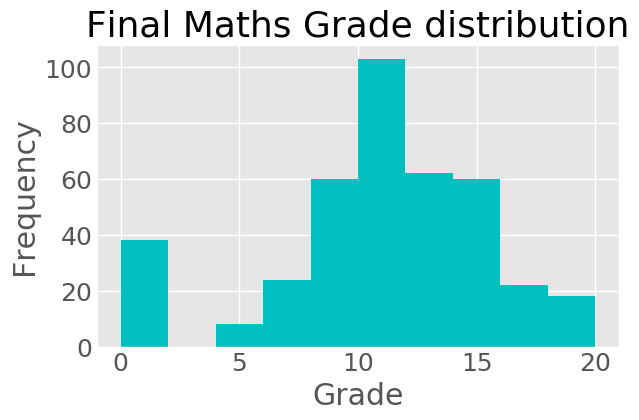

In [14]:
fig = plt.figure(dpi=100)
maths_dataset['G3'].hist(color='c')
plt.title('Final Maths Grade distribution')
plt.xlabel('Grade')
plt.ylabel('Frequency');

In [15]:
print('Gender proportions in the Portuguese dataset:\n'+ str(round(port_dataset['sex'].value_counts(normalize = True), 2)), '\n')
print('Age proportions in the Portuguese dataset:\n'+ str(round(port_dataset['age'].value_counts(normalize = True), 2)), '\n')
print('School proportions in the Portuguese dataset:\n'+ str(round(port_dataset['school'].value_counts(normalize = True), 2)), '\n')
print('Address proportions in the Portuguese dataset:\n'+ str(round(port_dataset['address'].value_counts(normalize = True), 2)), '\n')
print('Relationship proportions in the Portuguese dataset:\n'+ str(round(port_dataset['romantic'].value_counts(normalize = True), 2)), '\n')
print('Weekend alcohol consumption group proportions in the Portuguese dataset:\n'+ str(round(port_dataset['Walc'].value_counts(normalize = True), 2)), '\n')
print('Weekday alcohol consumption group proportions in the Portuguese dataset:\n'+ str(round(port_dataset['Dalc'].value_counts(normalize = True), 2)), '\n')

Gender proportions in the Portuguese dataset:
F    0.59
M    0.41
Name: sex, dtype: float64 

Age proportions in the Portuguese dataset:
17    0.28
16    0.27
18    0.22
15    0.17
19    0.05
20    0.01
21    0.00
22    0.00
Name: age, dtype: float64 

School proportions in the Portuguese dataset:
GP    0.65
MS    0.35
Name: school, dtype: float64 

Address proportions in the Portuguese dataset:
U    0.7
R    0.3
Name: address, dtype: float64 

Relationship proportions in the Portuguese dataset:
no     0.63
yes    0.37
Name: romantic, dtype: float64 

Weekend alcohol consumption group proportions in the Portuguese dataset:
1    0.38
2    0.23
3    0.18
4    0.13
5    0.07
Name: Walc, dtype: float64 

Weekday alcohol consumption group proportions in the Portuguese dataset:
1    0.69
2    0.19
3    0.07
5    0.03
4    0.03
Name: Dalc, dtype: float64 



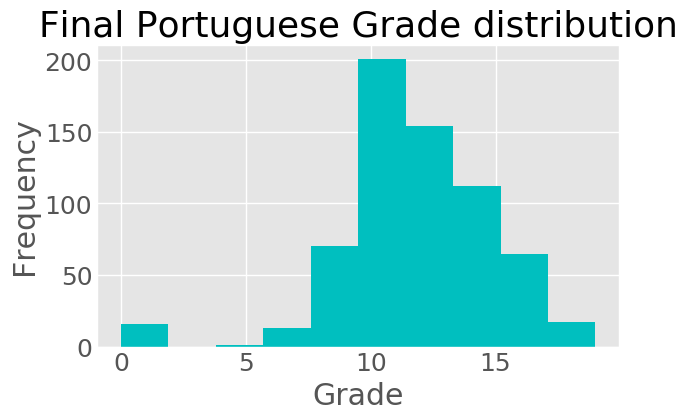

In [16]:
fig = plt.figure(dpi=100)
port_dataset['G3'].hist(color='c')
plt.title('Final Portuguese Grade distribution')
plt.xlabel('Grade')
plt.ylabel('Frequency');

### Finalize datasets before loading to SQL tables

In [17]:
#Drop columns that I am not interested in from both datasets
maths_dataset = maths_dataset.drop(columns=['school', 'Mjob', 'Fjob'])
port_dataset = port_dataset.drop(columns=['school', 'Mjob', 'Fjob'])

In [18]:
#Helper functions for grade translation

def grade_label(row):
    if row['G3'] < 10:
        return 'Fail'
    else:
        return 'Pass'
    
def grade_segment(row):
    segment = None
    if row['G3'] < 10:
        segment = 'Fail'
    elif row['G3'] < 14:
        segment = 'Good'
    elif row['G3'] < 16:
        segment = 'Very_Good'
    elif row['G3'] >= 16:
        segment = 'Excellent'
    else:
        segment = 'Error'
    return segment

In [19]:
#Create new columns (to mark discipline for easier merge of the two datasets) and grouping of final grades into Pass / Fail
#Maths dataset
maths_dataset['discipline'] = 'maths'
maths_dataset['final_grade_label'] = maths_dataset.apply(grade_label, axis=1)
maths_dataset['final_grade_segment'] = maths_dataset.apply(grade_segment, axis=1)

#Now for Portuguese dataset
port_dataset['discipline'] = 'portuguese'
port_dataset['final_grade_label'] = port_dataset.apply(grade_label, axis=1)
port_dataset['final_grade_segment'] = port_dataset.apply(grade_segment, axis=1)

### Let's create a database and two tables using SQL (on my AWS machine)

In [20]:
# Postgres info to connect

connection_args = {
    'host': '18.222.192.127', # You'll have to update this to your IP
    'user': 'ubuntu',    # username
    'dbname': 'student_grades',   # DB that we are connecting to
    'port': 5432         # port we opened on AWS
}

# We will talk about this magic Python trick!
connection = pg.connect(**connection_args)

In [21]:
create_tb_query_m = """CREATE TABLE IF NOT EXISTS maths_grades (
                            PrimaryId SERIAL PRIMARY KEY,
                            Discipline TEXT,
                            Sex TEXT,
                            Age INT,
                            Address TEXT,
                            FamilySize TEXT,
                            ParentsCohabStatus TEXT,
                            MothersEducation INT,
                            FathersEducation INT,
                            Guardian TEXT,
                            TravelTimeToSchool INT,
                            StudyTime INT,
                            Failures INT,
                            ExtraEducationalSupport TEXT,
                            FamilyEducationalSupport TEXT,
                            ExtraPaidClasses TEXT,
                            ExtraCurricularActivities TEXT,
                            WantsToAttendHigherEducation TEXT,
                            HasInternetAtHome TEXT,
                            IsInRelationship TEXT,
                            QualityOfFamilyRelationship INT,
                            FreeTime INT,
                            GoingOut INT,
                            WeekdayAlcoholCons INT,
                            WeekendAlcoholCons INT,
                            HealthQuality INT,
                            Absences INT,
                            FinalGrade INT,
                            FinalGradeSegments TEXT,
                            FinalGradeLabel TEXT)"""


In [22]:
create_tb_query_p = """CREATE TABLE IF NOT EXISTS portuguese_grades (
                            PrimaryId SERIAL PRIMARY KEY,
                            Discipline TEXT,
                            Sex TEXT,
                            Age INT,
                            Address TEXT,
                            FamilySize TEXT,
                            ParentsCohabStatus TEXT,
                            MothersEducation INT,
                            FathersEducation INT,
                            Guardian TEXT,
                            TravelTimeToSchool INT,
                            StudyTime INT,
                            Failures INT,
                            ExtraEducationalSupport TEXT,
                            FamilyEducationalSupport TEXT,
                            ExtraPaidClasses TEXT,
                            ExtraCurricularActivities TEXT,
                            WantsToAttendHigherEducation TEXT,
                            HasInternetAtHome TEXT,
                            IsInRelationship TEXT,
                            QualityOfFamilyRelationship INT,
                            FreeTime INT,
                            GoingOut INT,
                            WeekdayAlcoholCons INT,
                            WeekendAlcoholCons INT,
                            HealthQuality INT,
                            Absences INT,
                            FinalGrade INT,
                            FinalGradeSegments TEXT,
                            FinalGradeLabel TEXT)"""


In [23]:
#tables = ['maths_grades', 'portuguese_grades']

# make a cursor 
cursor = connection.cursor()

cursor.execute(create_tb_query_m)
cursor.execute(create_tb_query_p)

In [24]:
cursor.execute('commit;')

In [25]:
#Testing queries
query_m = """SELECT * FROM maths_grades LIMIT 1"""
query_p = """SELECT * FROM portuguese_grades LIMIT 1"""

pd_sql.read_sql(query_m, connection)
pd_sql.read_sql(query_p, connection)

,primaryid,discipline,sex,age,address,familysize,parentscohabstatus,motherseducation,fatherseducation,guardian,...,qualityoffamilyrelationship,freetime,goingout,weekdayalcoholcons,weekendalcoholcons,healthquality,absences,finalgrade,finalgradesegments,finalgradelabel


### Now load the data from pandas dataframes into my SQL tables

In [26]:
#Load the datasets into CSV (because I can't find an easy way to load from pandas directly to SQL tables, without having to create new tables from scratch)
maths_dataset.to_csv('maths_dataset.csv', encoding='utf-8')
port_dataset.to_csv('port_dataset.csv', encoding='utf-8')

In [29]:
maths_copy_query = """COPY maths_grades FROM '/Users/auste_m/ds/metis/metisgh/github/metis_projects/Student_Grades_Prediction/maths_dataset.csv' DELIMITER ',' CSV HEADER"""
port_copy_query = """COPY portuguese_grades FROM 'port_dataset.csv' DELIMITER ',' CSV HEADER"""

#Load the information into SQL tables
pd_sql.read_sql(maths_copy_query, connection)
pd_sql.read_sql(port_copy_query, connection)

DatabaseError: Execution failed on sql 'COPY maths_grades FROM 'maths_dataset.csv' DELIMITER ',' CSV HEADER': could not open file "maths_dataset.csv" for reading: No such file or directory


In [ ]:
pd_sql.read_sql(query_m, connection)

In [ ]:
pd_sql.read_sql(query_p, connection)